# 1. Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/Users/sejal/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# 2. Loading the dataset

In [2]:
titanic = sns.load_dataset('titanic')

# 3. Quick Look into the dataset

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


# 4. Summary statistics

In [6]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


1. How many people who survived and died from the titanic crash? Can you use the appropriate visualization to show these people?

In [8]:
titanic['survived'].value_counts()

survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='survived', ylabel='count'>

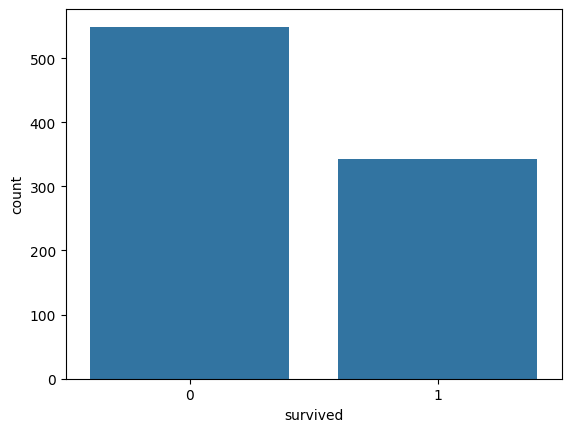

In [9]:
sns.countplot(data=titanic, x='survived')

2. How many pclass are there in the dataset? I it the same as the the text column class?

In [10]:
titanic['pclass'].value_counts()

pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [11]:
titanic['class'].value_counts()

class
Third     491
First     216
Second    184
Name: count, dtype: int64

In [12]:
p_class = titanic[['pclass', 'class']]
p_class.head()

,pclass,class
0,3,Third
1,1,First
2,3,Third
3,1,First
4,3,Third


3. How many genders are there in the dataset?

In [13]:
titanic['sex'].value_counts()

sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

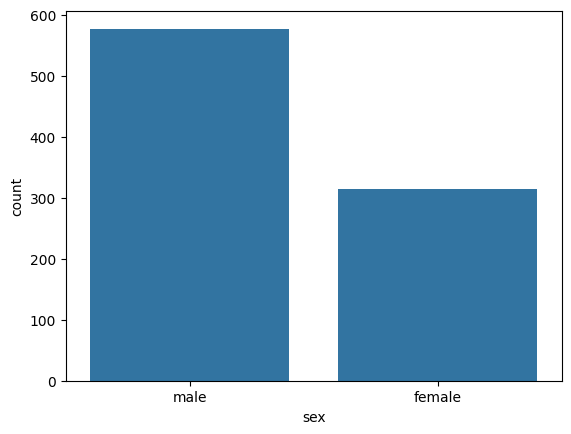

In [14]:
sns.countplot(data=titanic, x='sex')

4. Show the passengers who were less than 20 years

In [15]:
less_than_20 = titanic[titanic['age'] < 20 ]
less_than_20.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
14,0,3,female,14.0,0,0,7.8542,S,Third,child,False,NaN,Southampton,no,True
16,0,3,male,2.0,4,1,29.1250,Q,Third,child,False,NaN,Queenstown,no,False


In [16]:
len(less_than_20)

164

5. Show the categories of the passengers in the column who. Use Pie chart to illustrate their values

<Axes: ylabel='count'>

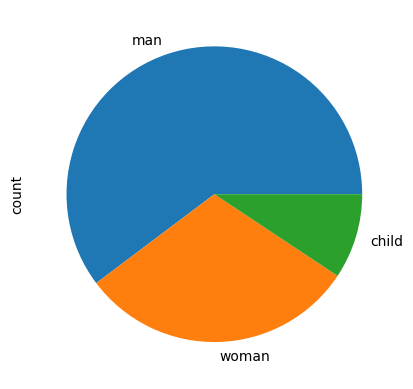

In [17]:
titanic.who.value_counts().plot(kind='pie')

6. How many unique cities are there in the column embark_town? Plot their occurences.

In [18]:
titanic['embark_town'].nunique()

3

<Axes: xlabel='embark_town'>

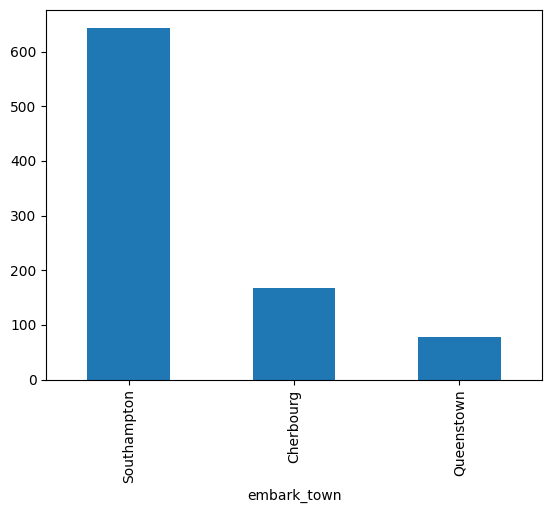

In [19]:
titanic['embark_town'].value_counts().plot(kind='bar')

# 5. Missing Data

In [20]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<Axes: >

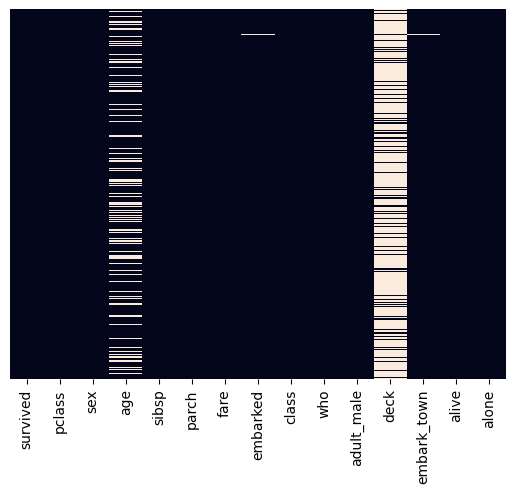

In [21]:
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False)

# 6. More Analysis

<Axes: xlabel='survived', ylabel='count'>

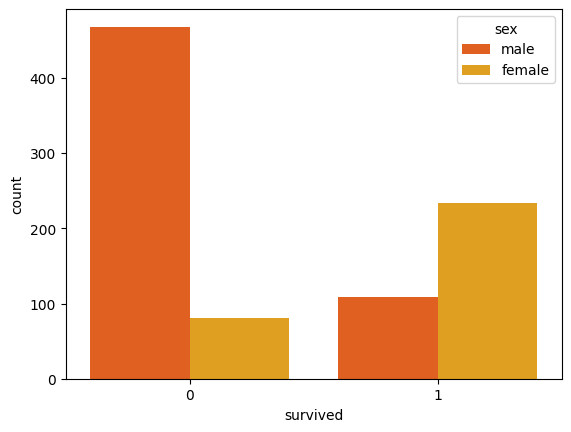

In [22]:
sns.countplot(data=titanic, x='survived', palette='autumn', hue='sex')

<Axes: xlabel='survived', ylabel='count'>

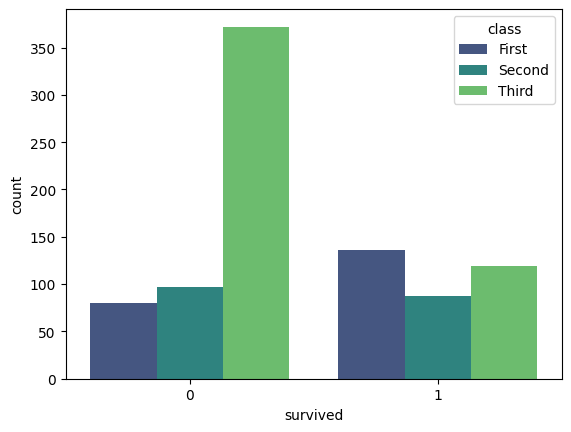

In [23]:
sns.countplot(data=titanic, x='survived', palette='viridis', hue='class')

<Axes: ylabel='Frequency'>

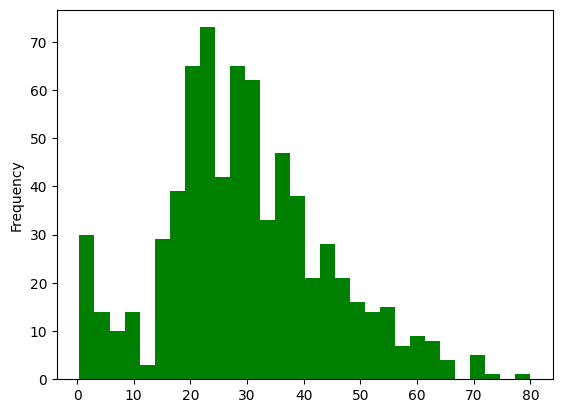

In [24]:
titanic.age.plot(kind='hist',bins=30,color='green')

<Axes: xlabel='age', ylabel='fare'>

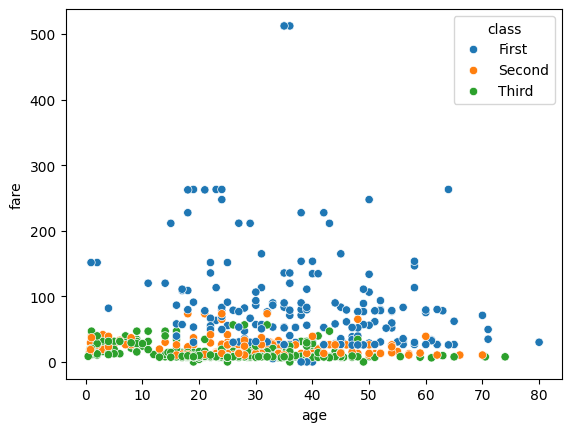

In [25]:
sns.scatterplot(data=titanic, x='age', y='fare', hue='class')

<Axes: xlabel='age', ylabel='fare'>

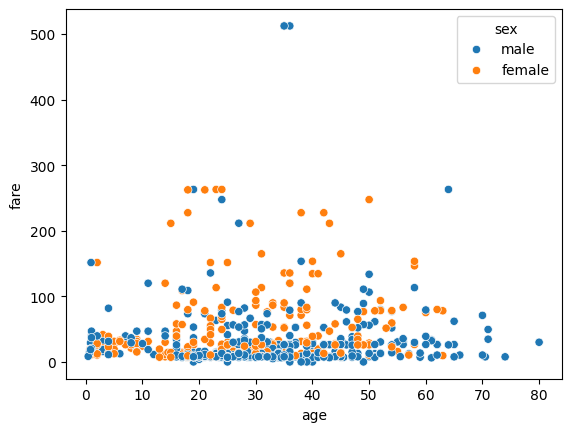

In [26]:
sns.scatterplot(data=titanic, x='age', y='fare', hue='sex')

# 7. Checking Correlating Features


In [30]:
titanic_encoded = pd.get_dummies(titanic, drop_first=True)
correlation = titanic_encoded.corr()
correlation

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,sex_male,embarked_Q,...,who_woman,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Queenstown,embark_town_Southampton,alive_yes
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367,-0.543351,0.003650,...,0.506562,0.175095,0.114652,0.150716,0.145321,0.057935,0.016040,0.003650,-0.155660,1.000000
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207,0.131900,0.221009,...,-0.177049,-0.369572,-0.417048,-0.278690,-0.230091,0.011063,0.055561,0.221009,0.081720,-0.338481
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270,0.093254,-0.022405,...,0.105081,0.093914,0.122041,0.136975,0.121440,-0.083970,-0.077296,-0.022405,-0.032523,-0.077221
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471,-0.114631,-0.026354,...,0.047071,-0.034538,0.029251,-0.017575,-0.036865,0.001706,-0.001402,-0.026354,0.070941,-0.035322
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398,-0.245489,-0.081228,...,0.150167,0.056498,0.030736,-0.019125,-0.016554,0.023694,0.072388,-0.081228,0.063036,0.081629
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832,-0.182333,-0.117216,...,0.191243,0.386297,0.364318,0.098878,0.053717,-0.033093,-0.025180,-0.117216,-0.166603,0.257307
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744,0.908578,-0.076789,...,-0.814281,-0.095696,-0.042050,-0.059374,-0.040505,-0.054228,-0.082709,-0.076789,0.112035,-0.557080
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000,0.303646,0.086464,...,-0.211036,-0.064914,-0.125062,-0.083664,-0.028179,-0.015972,-0.082709,0.086464,0.024929,-0.203367
sex_male,-0.543351,0.131900,0.093254,-0.114631,-0.245489,-0.182333,0.908578,0.303646,1.000000,-0.074115,...,-0.896214,-0.109689,-0.058649,-0.079248,-0.047003,-0.008202,-0.091031,-0.074115,0.125722,-0.543351
embarked_Q,0.003650,0.221009,-0.022405,-0.026354,-0.081228,-0.117216,-0.076789,0.086464,-0.074115,1.000000,...,0.100544,-0.072579,-0.049776,-0.060318,-0.037897,-0.004113,-0.020654,1.000000,-0.496624,0.003650


In [31]:
correlation['survived']

survived                   1.000000
pclass                    -0.338481
age                       -0.077221
sibsp                     -0.035322
parch                      0.081629
fare                       0.257307
adult_male                -0.557080
alone                     -0.203367
sex_male                  -0.543351
embarked_Q                 0.003650
embarked_S                -0.155660
class_Second               0.093349
class_Third               -0.322308
who_man                   -0.557080
who_woman                  0.506562
deck_B                     0.175095
deck_C                     0.114652
deck_D                     0.150716
deck_E                     0.145321
deck_F                     0.057935
deck_G                     0.016040
embark_town_Queenstown     0.003650
embark_town_Southampton   -0.155660
alive_yes                  1.000000
Name: survived, dtype: float64

<Axes: >

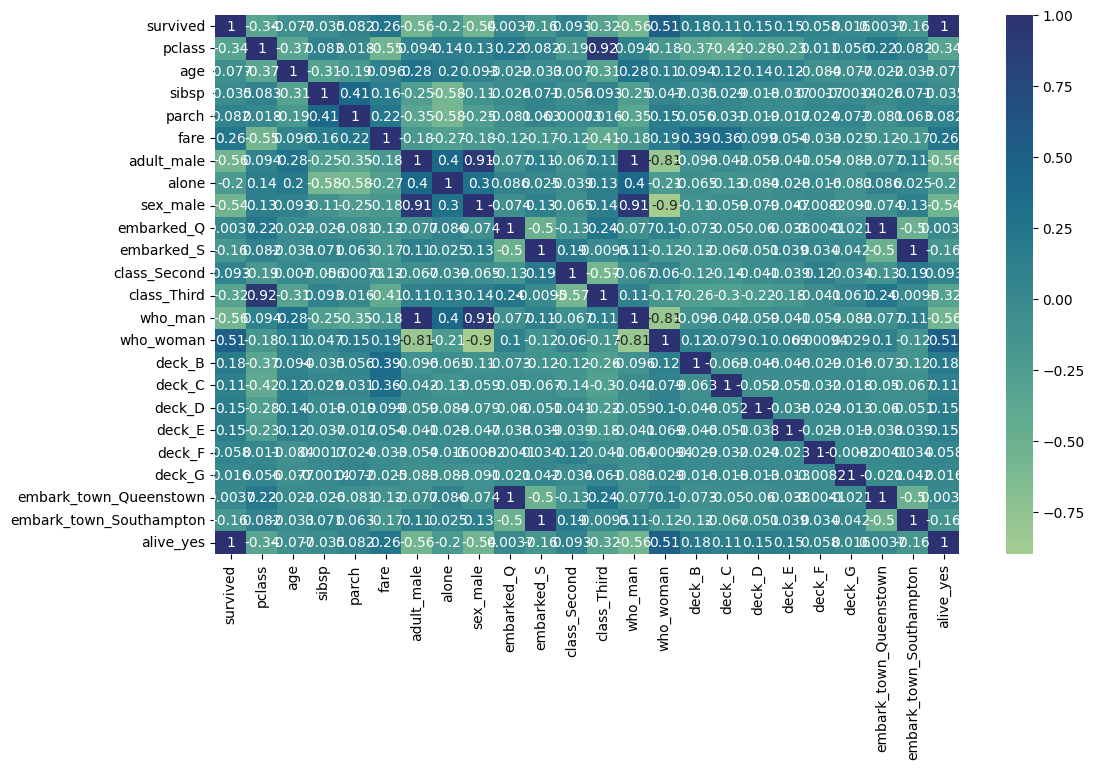

In [32]:
#### Visualizing correlation

plt.figure(figsize=(12,7))

sns.heatmap(correlation,annot=True,cmap='crest')